# Project 3 : Food Inspection 


### Goal 

- predict whether the food business pass or fail the inspection from public healthcare department 


### Dataset 

- city of Chicago

- Google Place API



### Potential Features


- Borough

- lat/lon

- Food Type

- Zip

- Rating

- Price

- Violation

- Total reviews

# 1. Load  dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv('data/Food_Inspections.csv')
df = pd.read_csv('data/Food_Inspections_-_Map.csv')

#lower case column names
df.columns = map(str.lower, df.columns)

print(len(df))
print(df.info())
print(df.columns)
df.head(3)

189608
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189608 entries, 0 to 189607
Data columns (total 21 columns):
dba name                      189608 non-null object
aka name                      187159 non-null object
license #                     189591 non-null float64
facility type                 184856 non-null object
risk                          189534 non-null object
address                       189608 non-null object
city                          189448 non-null object
state                         189567 non-null object
zip                           189528 non-null float64
inspection date               189608 non-null object
inspection type               189607 non-null object
results                       189608 non-null object
violations                    139295 non-null object
latitude                      188933 non-null float64
longitude                     188933 non-null float64
location                      188933 non-null object
historical wards 2003-2015    

,dba name,aka name,license #,facility type,risk,address,city,state,zip,inspection date,...,results,violations,latitude,longitude,location,historical wards 2003-2015,zip codes,community areas,census tracts,wards
0,77 W WACKER DR HOSPITALITY LLC,CLUB 77,2658215.0,Restaurant,Risk 3 (Low),77 W WACKER DR,CHICAGO,IL,60601.0,07/02/2019,...,Pass,NaN,41.886708,-87.630795,"(41.88670773797291, -87.6307945777937)",22.0,14309.0,38.0,92.0,36.0
1,TOTTO'S MARKET,TOTTO'S MARKET,2637113.0,Grocery Store,Risk 3 (Low),751 S DEARBORN ST,CHICAGO,IL,60605.0,07/02/2019,...,Pass w/ Conditions,NaN,41.872340,-87.628985,"(41.87234008744977, -87.62898467454927)",48.0,14913.0,38.0,12.0,10.0
2,LA FIESTA BAKERY,LA FIESTA BAKERY/TAQUERIA,1488177.0,Restaurant,Risk 1 (High),6424 S PULASKI RD,CHICAGO,IL,60629.0,07/02/2019,...,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.776073,-87.722841,"(41.77607320206961, -87.72284124538348)",23.0,21867.0,63.0,6.0,15.0


In [3]:
# fill city column with 'Chicago'
df[df['city'].isna()]
df['city'] = df['city'].fillna('Chicago')
df[df['city'].isna()]

,dba name,aka name,license #,facility type,risk,address,city,state,zip,inspection date,...,results,violations,latitude,longitude,location,historical wards 2003-2015,zip codes,community areas,census tracts,wards


In [4]:
print(len(df))
df = df.dropna(subset = ['facility type', 'violations'])
print(len(df))

189608
139179


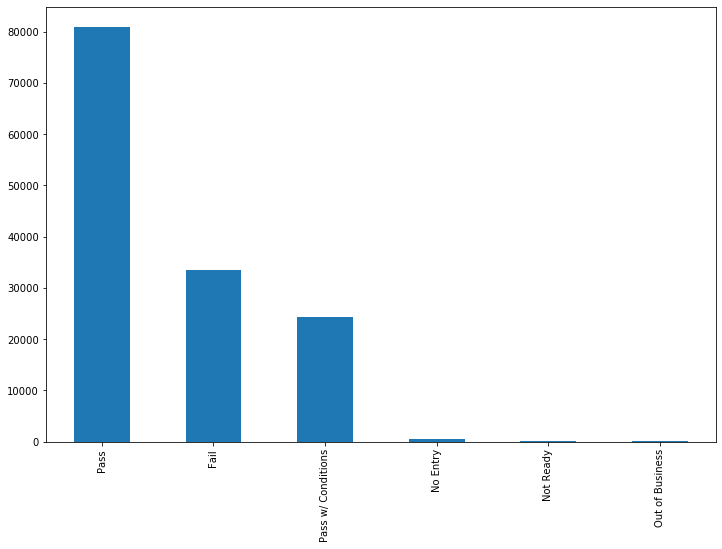

In [5]:
df.results.value_counts().plot(kind='bar',figsize=(12, 8))

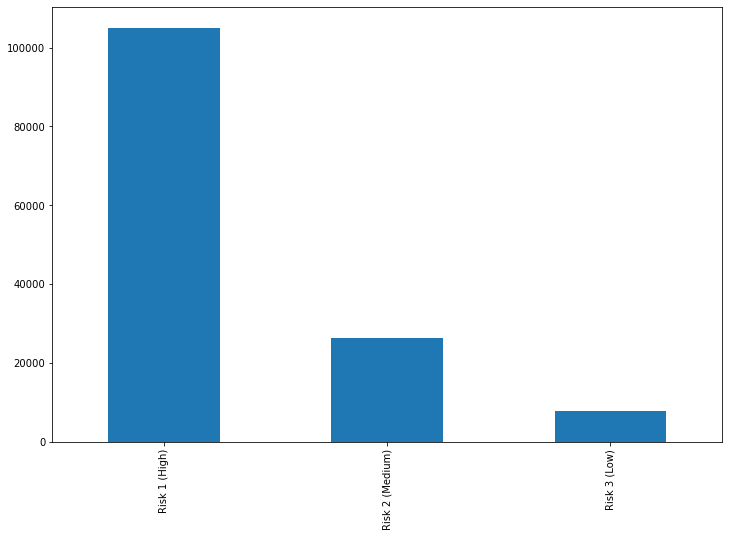

In [6]:
df.risk.value_counts().plot(kind='bar',figsize=(12, 8))

/Users/ducvu/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


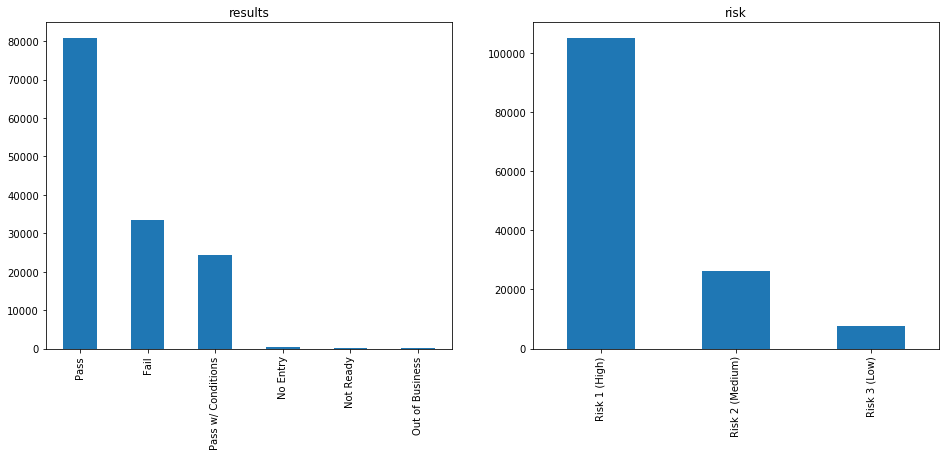

<Figure size 864x576 with 0 Axes>

In [7]:
categorical_features = ['results', 'risk']
fig, ax = plt.subplots(1, len(categorical_features))
plt.figure(figsize=(12, 8))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i],figsize=(16, 6)).set_title(categorical_feature)
fig.show()

### a. Select restaurant 

In [8]:
## Select restaurant 

df['facility type'] = df['facility type'].astype(str)
df['facility type'] = df['facility type'].map(lambda x: x.lower())

subset = ['restaurant',
          'restaurant(protein shake bar)',
         'restaurant.banquet halls',
         'restaurant/bakery',
         'restaurant/bar',
         'restaurant/bar/theater',
         'restaurant/gas station',
         'restaurant/grocery',
         'restaurant/grocery store',
         'restaurant/hospital',
         'restuarant and bar']


df = df[df['facility type'].isin(subset)]
df = df[df['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]
print(set(df['facility type']))
print(set(df['results']))
print(len(df))

{'restaurant/gas station', 'restaurant/grocery store', 'restaurant/hospital', 'restuarant and bar', 'restaurant/bakery', 'restaurant/bar', 'restaurant', 'restaurant/grocery', 'restaurant(protein shake bar)', 'restaurant/bar/theater', 'restaurant.banquet halls'}
{'Fail', 'Pass', 'Pass w/ Conditions'}
95345


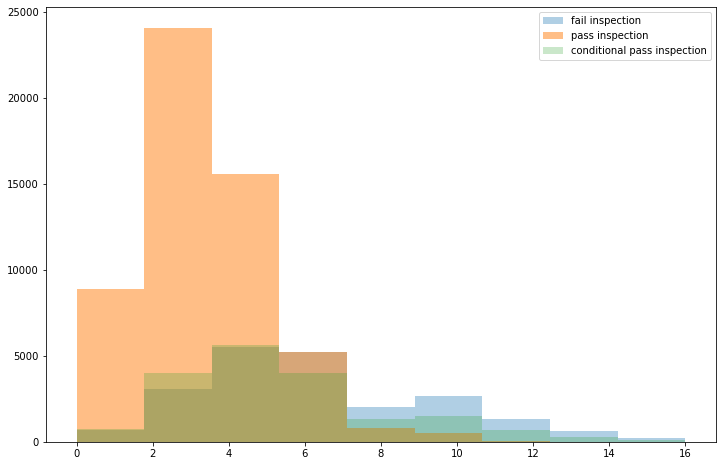

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

list_fail = list(df[df['results'] == 'Fail'].index)
fail_comment_num = [len(df['violations'][i].split('|')) for i in list_fail]

list_pass  = list(df[df['results'] == 'Pass'].index)
pass_comment_num = [len(df['violations'][i].split('|')) for i in list_pass]


list_condi_pass = list(df[df['results'] == 'Pass w/ Conditions'].index)
condi_pass_comment_num = [len(df['violations'][i].split('|')) for i in list_condi_pass]


bins = np.linspace(0, 16 , 10)
plt.figure(figsize=(12, 8))
plt.hist(fail_comment_num, bins, alpha=0.35, label='fail inspection')
plt.hist(pass_comment_num, bins, alpha=0.5, label='pass inspection')
plt.hist(condi_pass_comment_num, bins, alpha=0.25, label='conditional pass inspection')
plt.legend(loc='upper right')
plt.show()

### b. Find number of violations for each data point

In [10]:
df['number violations'] = df.apply(lambda x : len(x['violations'].split('|')), axis =1)

## 2. Load business license dataset

### a. Load dataset

In [11]:
df_license = pd.read_csv('./data/Business_Licenses_-_Current_Active.csv')
df_license.columns = map(str.lower, df_license.columns)

#rename column names 
df_license = df_license.rename(columns = {'zip code' : 'zip',
                                          'doing business as name' :'dba name'})
print(df_license.columns)
print(len(df_license))
df_license.head(3)

Index(['id', 'license id', 'account number', 'site number', 'legal name',
       'dba name', 'address', 'city', 'state', 'zip', 'ward', 'precinct',
       'ward precinct', 'police district', 'license code',
       'license description', 'business activity id', 'business activity',
       'license number', 'application type', 'application created date',
       'application requirements complete', 'payment date',
       'conditional approval', 'license term start date',
       'license term expiration date', 'license approved for issuance',
       'date issued', 'license status', 'license status change date', 'ssa',
       'latitude', 'longitude', 'location'],
      dtype='object')
1521


,id,license id,account number,site number,legal name,dba name,address,city,state,zip,...,license term start date,license term expiration date,license approved for issuance,date issued,license status,license status change date,ssa,latitude,longitude,location
0,2008417-20170816,2539718,349096,1,"KULAN RESTAURANT, INC.",KULAN RESTAURANT,6258 N CLARK ST 1ST,CHICAGO,IL,60660.0,...,08/16/2017,08/15/2019,06/29/2017,06/30/2017,AAI,NaN,NaN,41.996073,-87.670356,"(41.996072555837806, -87.67035563206306)"
1,2196972-20170816,2537179,14832,4,LA VILLA RESTAURANT INC.,LA VILLA,3632-3640 N PULASKI RD,CHICAGO,IL,60641.0,...,08/16/2017,08/15/2019,07/01/2017,07/03/2017,AAI,NaN,NaN,41.947381,-87.727577,"(41.94738145671126, -87.72757688336624)"
2,2196970-20170816,2537177,14832,4,LA VILLA RESTAURANT INC.,LA VILLA,3632-3640 N PULASKI RD,CHICAGO,IL,60641.0,...,08/16/2017,08/15/2019,07/01/2017,07/03/2017,AAI,NaN,NaN,41.947381,-87.727577,"(41.94738145671126, -87.72757688336624)"


In [12]:
# select some columns as features 
subset = ['license description','dba name', 'conditional approval', 
          'application type', 'business activity', 'license code', 
          'legal name', 'location','zip' ]


df_license = df_license[subset]
df_license.head(3)

,license description,dba name,conditional approval,application type,business activity,license code,legal name,location,zip
0,Retail Food Establishment,KULAN RESTAURANT,N,RENEW,Retail Sales of Perishable Foods,1006,"KULAN RESTAURANT, INC.","(41.996072555837806, -87.67035563206306)",60660.0
1,Consumption on Premises - Incidental Activity,LA VILLA,N,RENEW,Consumption of Liquor on Premises,1475,LA VILLA RESTAURANT INC.,"(41.94738145671126, -87.72757688336624)",60641.0
2,Retail Food Establishment,LA VILLA,N,RENEW,Retail Sales of Perishable Foods,1006,LA VILLA RESTAURANT INC.,"(41.94738145671126, -87.72757688336624)",60641.0


### b. Merge food inspection with business license 

In [13]:
# merge food inspection with business license 
data = pd.merge(df, df_license, how='inner', on=['location'])
#data = pd.merge(df, df_license, how='inner', on=[,'dba name',])

print(len(data))
data = data.dropna()
print(len(data))
data.columns

41643
23245


Index(['dba name_x', 'aka name', 'license #', 'facility type', 'risk',
       'address', 'city', 'state', 'zip_x', 'inspection date',
       'inspection type', 'results', 'violations', 'latitude', 'longitude',
       'location', 'historical wards 2003-2015', 'zip codes',
       'community areas', 'census tracts', 'wards', 'number violations',
       'license description', 'dba name_y', 'conditional approval',
       'application type', 'business activity', 'license code', 'legal name',
       'zip_y'],
      dtype='object')

In [14]:
# convert zip from string to int
data['zip_x'] = data['zip_x'].astype(int)

# add full address column for Google API
data['full address'] = [','.join(i) for i in  zip(data['dba name_x'], data['address'], \
                                                  data['city'], data['state'], data['zip_x'].map(str))]

# drop duplicate columns 
data = data.drop([ 'license #', 'zip_y', 'dba name_y'], axis = 1)

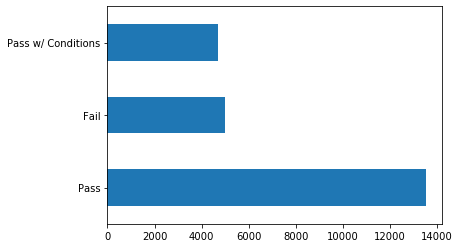

In [15]:
data['results'].value_counts().plot(kind='barh')

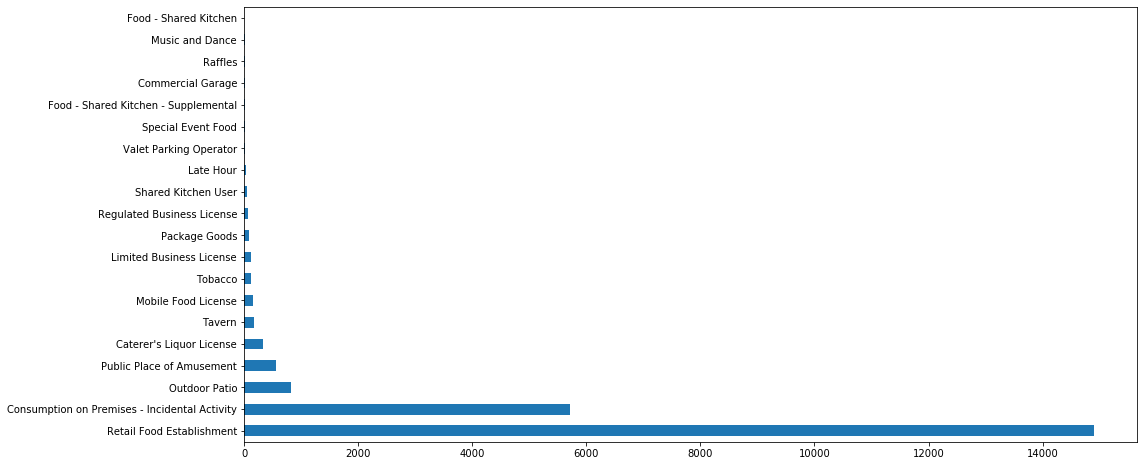

In [16]:
plt.figure(figsize=(16, 8))
data['license description'].value_counts().plot(kind='barh')

## 3. Rating dataset from Google place API 

- First of all, we need API Key to request query from google API `findplacefromtext`


- Extract the `price level`, `rating` and `user_ratings_total` for each restaurant in dataset


In [24]:
#https://maps.googleapis.com/maps/api/place/details/output?parameters   
import requests
import json
import re
import numpy as np
API_KEY = 'your_api'   

def findPlaceDetails(address):
    
    url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input={address}\
    &inputtype=textquery&fields=price_level,rating,user_ratings_total&key={API_KEY}"\
    .format(address = address,API_KEY = API_KEY)       
    
    response = requests.get(url)
    res = json.loads(response.text)

    if len(res['candidates']):
        return res['candidates'][0]
    else:
        return np.nan

In [2]:
def corrrect_address2(address):
    
    address = ','.join(re.split(r'[.&@#\'-]', address)) 
    if address[0].isdigit():
        address = ','.join(address.split(' ')[1:])        
    return address


def corrrect_address(address):
    
    ad1 = address.split(',')[:-4]
    ad2 = address.split(',')[-4]
    ad3 = address.split(',')[-3:]

    ad1 = re.split(r'[.&@#\'-]', ad1[0])[0] 
    if ad1[0].isdigit():
        ad1 = ','.join(ad1.split(' ')[1:])
    
    ad2 = ad2.split(' ')[0].split('-')[0] + ' '  + ' '.join(ad2.split(' ')[1:])
    address = ','.join([ad1] + [ad2] + ad3)   
    return address


def extract_rating_review(addresses, filename=None):
    rating = []
                        
    for address in addresses:
        dic = {}
        #print(address)
        dic['full address'] = address 
        address = corrrect_address(address)
        try:
            dic.update(findPlaceDetails(address))

        except:
            print('error at address : {} '.format(address) )
            dic['price_level'] = np.nan
            dic['rating'] = np.nan
            dic['user_ratings_total'] = np.nan
            
        rating.append(dic) 
                    
    rating_df = pd.DataFrame(rating)
    rating_df.to_csv(filename)
    return rating_df 

In [19]:
# find the unique restaurant address in dataset 
restaurant_address = list(set(data['full address']))

print(len(set(data['full address'])), len(restaurant_address))

1682 1682


In [70]:
# extract rating and save its dataframe intp csv file
extract_rating_review(restaurant_address, filename='.data/rating.csv')

error at address : MI LINDO PUEBLO RESTAURANT,3038 W MONTROSE AVE ,CHICAGO,IL,60618 
error at address : Hunter ,2700 W CHICAGO AVE ,CHICAGO,IL,60622 
error at address : MAC KELLY,216 W JACKSON BLVD ,CHICAGO,IL,60606 
error at address : TAQUERIA Y TAMALERIA GUERRERENCE,6706 W BELMONT AVE ,CHICAGO,IL,60634 
error at address : TAMALESY RESTAURANT COSTA GRANDE,10148 S EWING AVE ,CHICAGO,IL,60617 
error at address : THE HOT DOG GUY,131 N CLINTON #30,CHICAGO,IL,60661 
error at address : LITTLE GREEK CORNER INC,131 N CLINTON ST ,CHICAGO,IL,60661 
error at address : EL MICHOACANITO,4311 N KEDZIE AVE ,CHICAGO,IL,60618 
error at address : SOUL GOURMET,740 W 63ST ,CHICAGO,IL,60621 
error at address : KCG OF CHICAGO UNION STATION,225 S CANAL ST ,CHICAGO,IL,60606 
error at address : RED COACH RESTAURANT,7353 S CICERO AVE ,CHICAGO,IL,60629 
error at address : BAHA RESTAURANT,4842 W DIVERSEY AVE ,CHICAGO,IL,60639 
error at address : LILIW M3 ORIENTAL STORE INC,4311 - 4315 N KEDZIE AVE ,CHICAGO,IL,606

,full address,price_level,rating,user_ratings_total
0,"EXPRESS CAFE INC,3924 W DIVERSEY AVE ,CHICAGO,...",NaN,4.7,48.0
1,"LA GOZADERA,2542-2544 W PETERSON AVE ,CHICAGO,...",2.0,4.2,196.0
2,"SOMERSET/DEVEREAUX,1118 N STATE ST ,CHICAGO,IL...",NaN,4.7,458.0
3,"SUBWAY,4600 W BELMONT AVE ,CHICAGO,IL,60641",1.0,3.7,114.0
4,"COCULA RESTAURANT,8847 S COMMERCIAL AVE ,CHICA...",2.0,4.1,913.0
5,"Lokal Contemporary European,1904 W NORTH AVE...",NaN,0.0,0.0
6,"DIL DA MAHRAM,1554 N LARRABEE ST ,CHICAGO,IL,6...",NaN,NaN,NaN
7,"AUNTIE ANNE'S PRETZELS & RED MANGO,835 N MICHI...",1.0,3.8,36.0
8,"EL VITOR NACATACOS #2, INC.,4114 W NORTH AVE ,...",1.0,4.3,177.0
9,"KFC,3927 N HARLEM AVE ,CHICAGO,IL,60634",1.0,3.2,219.0


### b. Merge data with rating 

In [21]:
rating = pd.read_csv('./data/rating.csv')

In [22]:
# merge data with rating 
data = pd.merge(data, rating, how='inner', on=['full address'])

### c. Save dataset

In [23]:
data.to_csv('./data/input.csv')